In [1]:
#import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#converting data dictionary into DataFrame
file='lung_disease_data.csv'
df = pd.read_csv(file)
df.head()

,Age,Gender,Smoking Status,Lung Capacity,Disease Type,Treatment Type,Hospital Visits,Recovered
0,71.0,Female,No,4.49,COPD,Therapy,14.0,Yes
1,34.0,Female,Yes,NaN,Bronchitis,Surgery,7.0,No
2,80.0,Male,Yes,1.95,COPD,NaN,4.0,Yes
3,40.0,Female,Yes,NaN,Bronchitis,Medication,1.0,No
4,43.0,Male,Yes,4.60,COPD,Surgery,NaN,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4900 non-null   float64
 1   Gender           4900 non-null   object 
 2   Smoking Status   4900 non-null   object 
 3   Lung Capacity    4900 non-null   float64
 4   Disease Type     4900 non-null   object 
 5   Treatment Type   4900 non-null   object 
 6   Hospital Visits  4900 non-null   float64
 7   Recovered        4900 non-null   object 
dtypes: float64(3), object(5)
memory usage: 325.1+ KB


In [5]:
# Delete rows containing missing values
data_cleaned = df.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3236 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              3236 non-null   float64
 1   Gender           3236 non-null   object 
 2   Smoking Status   3236 non-null   object 
 3   Lung Capacity    3236 non-null   float64
 4   Disease Type     3236 non-null   object 
 5   Treatment Type   3236 non-null   object 
 6   Hospital Visits  3236 non-null   float64
 7   Recovered        3236 non-null   object 
dtypes: float64(3), object(5)
memory usage: 227.5+ KB


In [6]:
data_cleaned.describe()

,Age,Lung Capacity,Hospital Visits
count,3236.000000,3236.000000,3236.000000
mean,54.229604,3.479617,7.502163
std,20.109979,1.465408,3.983233
min,20.000000,1.000000,1.000000
25%,37.000000,2.210000,4.000000
50%,54.000000,3.440000,8.000000
75%,72.000000,4.790000,11.000000
max,89.000000,6.000000,14.000000


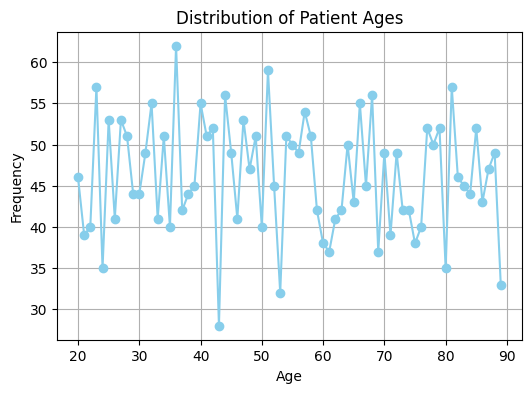

In [7]:
# Calculate the frequency of age distribution
age_counts = data_cleaned['Age'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-', color='skyblue')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

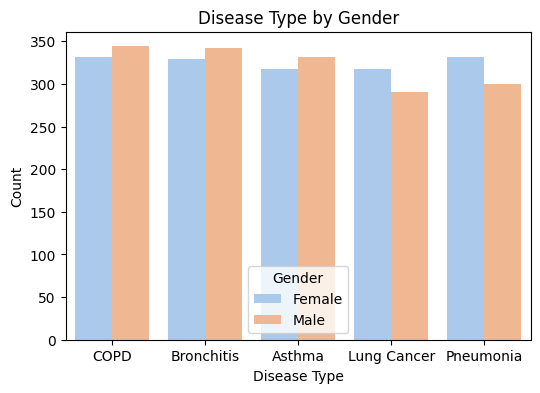

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Disease Type', hue='Gender', data=data_cleaned, palette='pastel')
plt.title('Disease Type by Gender')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

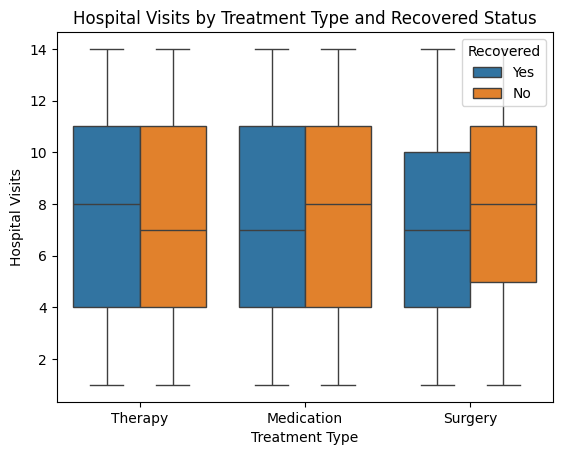

In [15]:
sns.boxplot(x='Treatment Type', y='Hospital Visits', hue='Recovered', data=data_cleaned)
plt.title('Hospital Visits by Treatment Type and Recovered Status')
plt.show()

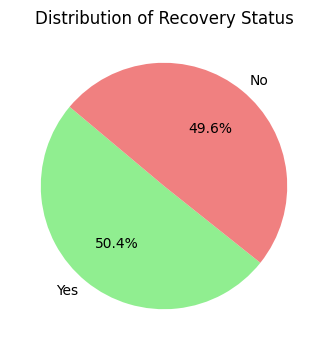

In [18]:
recovered_counts = data_cleaned['Recovered'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(recovered_counts, labels=recovered_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Recovery Status')
plt.show()

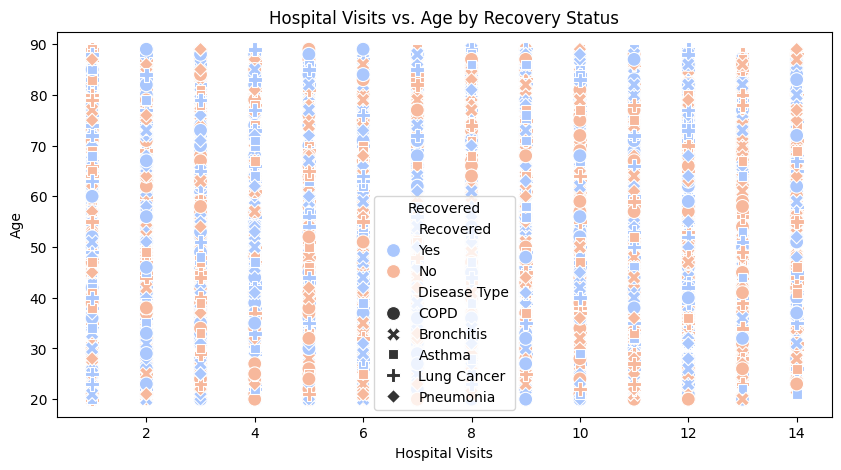

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Hospital Visits', y='Age', hue='Recovered', data=data_cleaned, palette='coolwarm', style='Disease Type', s=100)
plt.title('Hospital Visits vs. Age by Recovery Status')
plt.xlabel('Hospital Visits')
plt.ylabel('Age')
plt.legend(title='Recovered')
plt.show()